In [6]:
import csv

crime_list = []
stress_list = []

# 경제활동.csv 파일 처리
with open("team_data/실업자.csv", encoding='utf-8') as f:
    data = csv.reader(f)
    data = list(data)
    for i in data:
        for z in i[2:]:
            if z == '-':
                crime_list.append(0.0)  # '-'를 0.0으로 대체
            else:
                try:
                    crime_list.append(float(z))
                except ValueError:
                    print(f"변환 불가 값 (crime_list): {z}")  # 변환 불가한 값을 출력해 확인
                    continue
            
    print("crime_list:", crime_list)

# stress1.csv 파일 처리
with open('team_data/stress1.csv', encoding='utf-8') as f2:
    data = csv.reader(f2)
    next(data)
    data = list(data)
    for i in data:
        for z in i[1:-1]:
            try:
                stress_list.append(float(z))
            except ValueError:
                print(f"변환 불가 값 (stress_list): {z}")  # 변환 불가한 값을 출력해 확인
                continue
            
    print("stress_list:", stress_list)


crime_list: [226.0, 226.0, 244.0, 254.0, 233.0, 241.0, 257.0, 181.0, 146.0, 71.0, 69.0, 81.0, 71.0, 65.0, 72.0, 58.0, 51.0, 55.0, 45.0, 54.0, 52.0, 56.0, 47.0, 48.0, 47.0, 37.0, 39.0, 79.0, 78.0, 75.0, 70.0, 72.0, 74.0, 66.0, 56.0, 54.0, 22.0, 23.0, 22.0, 30.0, 29.0, 30.0, 28.0, 22.0, 20.0, 27.0, 26.0, 27.0, 34.0, 34.0, 36.0, 27.0, 19.0, 23.0, 17.0, 23.0, 21.0, 28.0, 25.0, 25.0, 21.0, 19.0, 20.0, 0.0, 0.0, 3.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 261.0, 264.0, 269.0, 268.0, 274.0, 285.0, 272.0, 211.0, 206.0, 25.0, 22.0, 21.0, 24.0, 30.0, 33.0, 30.0, 27.0, 24.0, 22.0, 23.0, 20.0, 22.0, 28.0, 29.0, 23.0, 23.0, 22.0, 43.0, 40.0, 33.0, 38.0, 35.0, 42.0, 28.0, 29.0, 33.0, 16.0, 20.0, 24.0, 26.0, 26.0, 24.0, 21.0, 24.0, 25.0, 25.0, 30.0, 31.0, 28.0, 26.0, 24.0, 24.0, 23.0, 23.0, 45.0, 47.0, 41.0, 61.0, 58.0, 60.0, 47.0, 37.0, 39.0, 46.0, 59.0, 52.0, 54.0, 69.0, 72.0, 73.0, 59.0, 45.0, 7.0, 8.0, 7.0, 7.0, 8.0, 10.0, 12.0, 9.0, 8.0]
stress_list: [29.7, 30.3, 29.1, 26.8, 26.4, 25.8, 27.8, 26.3, 24.0,

In [8]:
import pandas as pd
import numpy as np

# 두 리스트의 길이 확인
print(f"Length of crime_list: {len(crime_list)}")
print(f"Length of stress_list: {len(stress_list)}")

# 두 리스트의 길이를 맞추기 위해 NaN 값 추가
if len(crime_list) > len(stress_list):
    stress_list.extend([np.nan] * (len(crime_list) - len(stress_list)))
elif len(stress_list) > len(crime_list):
    crime_list.extend([np.nan] * (len(stress_list) - len(crime_list)))
df = pd.DataFrame()
df = pd.DataFrame()
df['고혈압'] = crime_list
df['스트레스'] = stress_list

df

Length of crime_list: 153
Length of stress_list: 153


,고혈압,스트레스
0,226.0,29.7
1,226.0,30.3
2,244.0,29.1
3,254.0,26.8
4,233.0,26.4
...,...,...
148,8.0,25.4
149,10.0,21.9
150,12.0,24.6
151,9.0,23.8


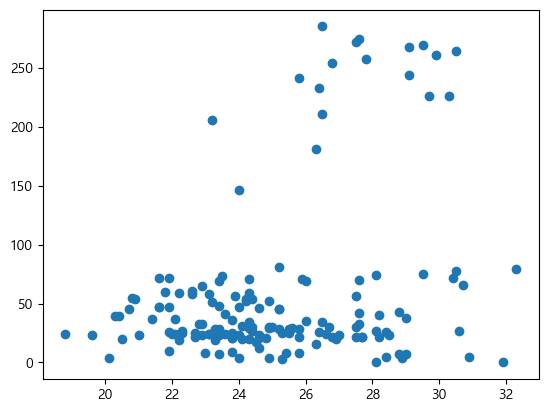

In [10]:
from matplotlib import pyplot as plt
#%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

plt.rc('font', family='Malgun Gothic')
plt.scatter(df['스트레스'], df['고혈압']) 
plt.show() #그래프 표시


In [12]:
correlation = df.corr()
print(correlation)

           고혈압      스트레스
고혈압   1.000000  0.325353
스트레스  0.325353  1.000000


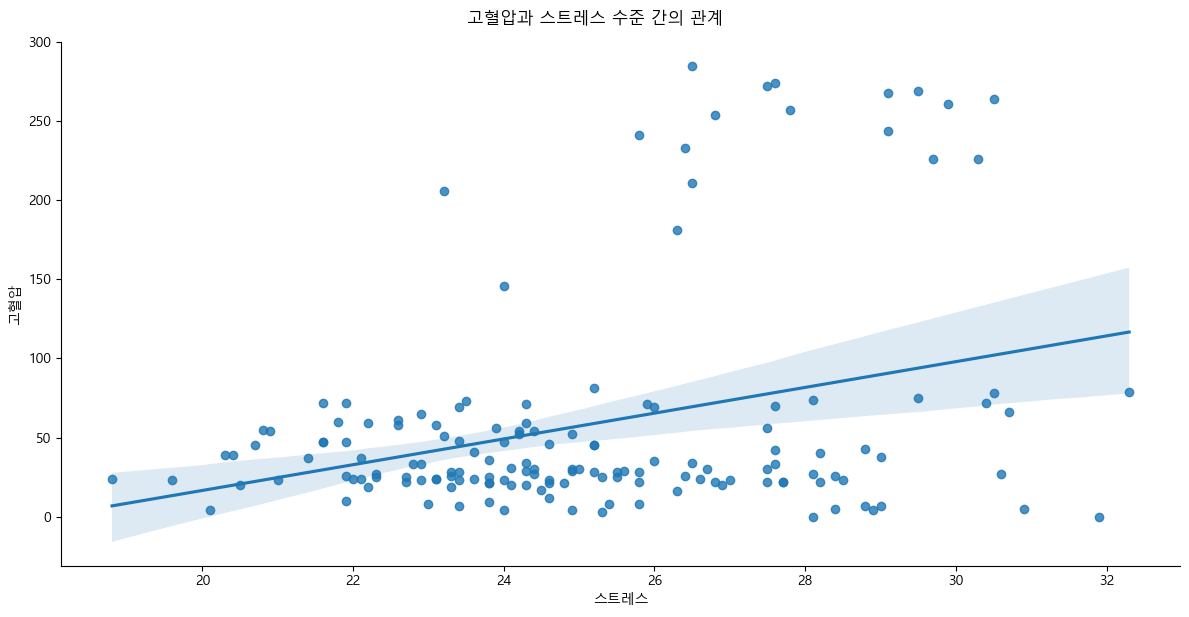

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.lmplot(x='스트레스', y='고혈압', data=df, height=6, aspect=2)
plt.suptitle('고혈압과 스트레스 수준 간의 관계', y=1.02)
plt.show()